## Tools

In [21]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score

## Dataset

In [22]:
df = pd.read_csv("../data/01-modified-data/combined_data_clean01.csv")
data = df

In [23]:
columns_to_drop = ['DX']
y= df['DX']
feature_names = df.columns[df.columns != 'DX']
X = df.drop(columns_to_drop, axis=1)

In [24]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Selection using Mutual Information
selector = SelectKBest(mutual_info_classif, k=6)  # Selecting the 6 best features
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Naive Bayes Classifier
clf = GaussianNB()
clf.fit(X_train_selected, y_train)

# Prediction and Evaluation
predictions = clf.predict(X_test_selected)
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')


# Display the best features
selected_features_indices = selector.get_support(indices=True)
print("Selected feature indices:", selected_features_indices)
print("Selected features:", [feature_names[i] for i in selected_features_indices])

Accuracy: 0.8131868131868132
Selected feature indices: [0 4 5 6 7 8]
Selected features: ['Site', 'ADHD Index', 'Inattentive', 'Hyper/Impulsive', 'IQ Measure', 'Verbal IQ']


In [25]:
# Assuming predictions and y_test are already defined
# predictions: the predicted labels from your model
# y_test: the true labels

# Calculate precision and recall
precision = precision_score(y_test, predictions, average='macro')  # for binary classification
recall = recall_score(y_test, predictions, average='macro')  # recall is the same as sensitivity


# Print precision and recall
print(f"Precision: {precision}")
print(f"Recall/Sensitivity: {recall}")
# Calculate F1 Scores
micro_f1 = f1_score(y_test, predictions, average='micro')
macro_f1 = f1_score(y_test, predictions, average='macro')
weighted_f1 = f1_score(y_test, predictions, average='weighted')

# Print the Scores
print(f'Micro F1 Score: {micro_f1}')
print(f'Macro F1 Score: {macro_f1}')
print(f'Weighted F1 Score: {weighted_f1}')


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

Precision: 0.8464052287581699
Recall/Sensitivity: 0.6276515151515151
Micro F1 Score: 0.8131868131868132
Macro F1 Score: 0.6897220426632192
Weighted F1 Score: 0.8007273915483353
Confusion Matrix:
[[60  4  0]
 [10 12  0]
 [ 2  1  2]]


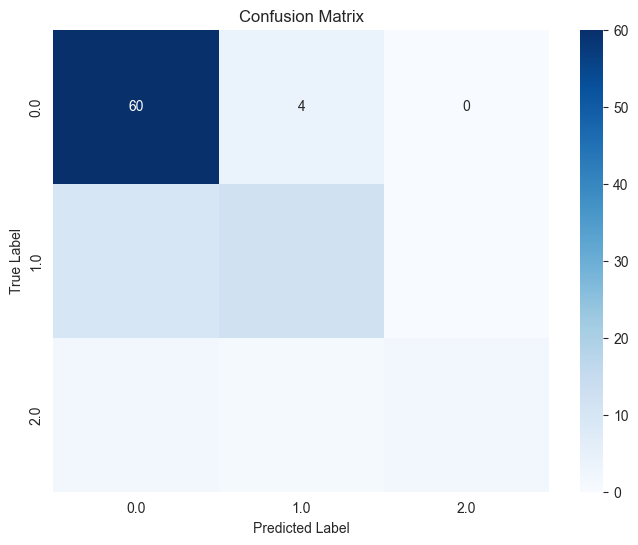

In [26]:
cm = confusion_matrix(y_test, predictions)
labels = np.unique(y_test)  # Change this if you have specific class names

# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

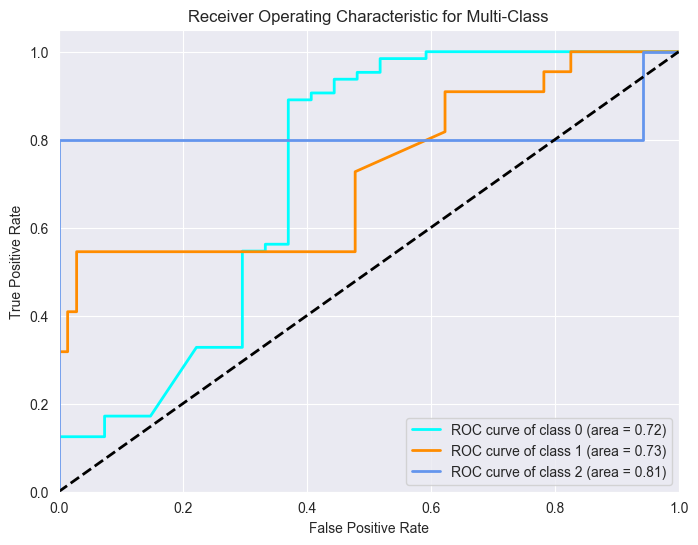

In [29]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Binarize the output for ROC curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Predict probabilities
y_score = clf.predict_proba(X_test_selected)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc="lower right")
plt.show()


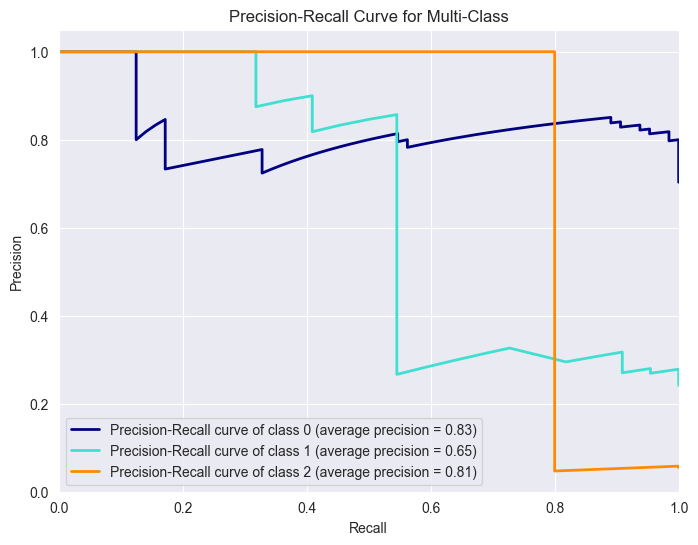

In [30]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from itertools import cycle

# Calculate precision-recall curve and average precision for each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_score[:, i])

# Plotting
plt.figure(figsize=(8, 6))
colors = cycle(['navy', 'turquoise', 'darkorange'])
for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2, label=f'Precision-Recall curve of class {i} (average precision = {average_precision[i]:0.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve for Multi-Class')
plt.legend(loc="lower left")
plt.show()

In [ ]:
corr = data.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

In [ ]:
# Assuming you have a model with feature_importances_ attribute (like RandomForest)
from sklearn.inspection import permutation_importance

# Assuming clf is your trained Gaussian Naive Bayes model
result = permutation_importance(clf, X_test_selected, y_test, n_repeats=10, random_state=42)

# Plotting
plt.figure(figsize=(10, 8))
sorted_idx = result.importances_mean.argsort()
plt.barh(range(X_test_selected.shape[1]), result.importances_mean[sorted_idx])
plt.yticks(range(X_test_selected.shape[1]), X_test.columns[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.histplot(data, ax=axes[0], x="ADHD Index", kde=True, color='r')
sns.histplot(data, ax=axes[1], x="Site", kde=True, color='r')
sns.histplot(data, ax=axes[2], x="Verbal IQ", kde=True, color='r')

In [ ]:
data.head()

In [ ]:
new_df = df.loc[:, ['Site', 'ADHD Index', 'Inattentive', 'Hyper/Impulsive', 'IQ Measure', 'Verbal IQ','DX']]

In [ ]:
new_df.to_csv('../data/01-modified-data/combined_data_clean02.csv', index=False)